In [1]:
import numpy as np
import pandas as pd

In [2]:
import os

base_path = r"C:\Users\thaip\Desktop\Exercise 6\data\news_1135"

all_texts = []

for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.endswith(".txt"):  # chỉ đọc file .txt
            file_path = os.path.join(root, file)
            with open(file_path, "r", encoding="utf-8", errors="ignore") as f:
                content = f.read()
                all_texts.append({
                    "category": os.path.basename(root),  # tên thư mục cha (vd: Thể thao)
                    "filename": file,
                    "content": content
                })

print(f"Đã đọc {len(all_texts)} file văn bản.")
print("Ví dụ 1 file đầu tiên:\n")
print("Thể loại:", all_texts[0]["category"])
print("tên file:", all_texts[0]["filename"])
print("Nội dung:\n", all_texts[0]["content"][:500], "...")


Đã đọc 224 file văn bản.
Ví dụ 1 file đầu tiên:

Thể loại: Sức khỏe
tên file: 065cce8fbcdcb7df6941f23f515874f868ed501a.txt
Nội dung:
 Bình_thường tôi không sao , nhưng vào mùa_đông , sau khi tắm , lau khô người , mặc quần_áo là ngứa khắp người khoảng 5 phút , nhưng không có hiện_tượng đỏ hay nổi mẩn . Bình_thường tôi không sao , nhưng vào mùa_đông , sau khi tắm , lau khô người , mặc quần_áo là ngứa khắp người khoảng 5 phút , nhưng không có hiện_tượng đỏ hay nổi mẩn . Xin hỏi , hiện_tượng đó là gì , điều_trị thế_nào ? Nguồn nước nhà_tôi không bị ô_nhiễm . Trần Văn Đan ( Nghệ_An ) Ngứa da thường hay xảy_ra khi da bị khô và tróc  ...


In [3]:
import pandas as pd
df = pd.DataFrame(all_texts)
df.to_csv("all_news.csv", index=False, encoding="utf-8-sig")


In [4]:
df.head()

,category,filename,content
0,Sức khỏe,065cce8fbcdcb7df6941f23f515874f868ed501a.txt,"Bình_thường tôi không sao , nhưng vào mùa_đông..."
1,Sức khỏe,0748735478fff881281d124207782e3ee26aa3ca.txt,"Dân_trí Đôi_khi , dù có xỏ bao_nhiêu đôi tất ,..."
2,Sức khỏe,078192445fcfa9f6ad7966d9bb096d4538ca3e27.txt,Dân_trí Dưới_đây là những lời_khuyên của các b...
3,Sức khỏe,0c793f78b653ec265aa155f662a24ced5df9102b.txt,"Dân_trí Sau khi được Bộ Y_tế cấp phép , hệ_thố..."
4,Sức khỏe,0d20684ca0b0bbfdd2acf2c9afaceb0b0fb76706.txt,Dân_trí Liên_quan đến vụ bé gái 7 tuổi tử_vong...


In [5]:
df['category'].value_counts()


category
Thể thao    140
Sức khỏe     70
Thời sự      14
Name: count, dtype: int64

In [6]:
from pyvi import ViTokenizer

In [7]:
df1 = df.drop(columns = ["filename"])
df1.head()

,category,content
0,Sức khỏe,"Bình_thường tôi không sao , nhưng vào mùa_đông..."
1,Sức khỏe,"Dân_trí Đôi_khi , dù có xỏ bao_nhiêu đôi tất ,..."
2,Sức khỏe,Dân_trí Dưới_đây là những lời_khuyên của các b...
3,Sức khỏe,"Dân_trí Sau khi được Bộ Y_tế cấp phép , hệ_thố..."
4,Sức khỏe,Dân_trí Liên_quan đến vụ bé gái 7 tuổi tử_vong...


In [8]:
with open("data/vietnamese-stopwords.txt", encoding="utf8") as f:
    stopwords = [x.strip().replace(" ", "_") for x in f.readlines()]

print("10 từ dừng đầu tiên:", stopwords[:10])



10 từ dừng đầu tiên: ['a_lô', 'a_ha', 'ai', 'ai_ai', 'ai_nấy', 'ai_đó', 'alô', 'amen', 'anh', 'anh_ấy']


In [9]:
import sklearn.naive_bayes as naive_bayes
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

In [10]:
X = df["content"]
y = df["category"]

In [11]:
tfidf = TfidfTransformer()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df["content"], df["category"], test_size=0.2, random_state=30)
vectorizer = CountVectorizer(stop_words=stopwords)
tfidf = TfidfTransformer()
model_preprocess = Pipeline([
    ("vect", vectorizer),
    ("tfidf", tfidf),
])

X_tfidf = model_preprocess.fit_transform(X_train)

print("Shape TF-IDF:", X_tfidf.shape)

vocab = model_preprocess.named_steps["vect"].vocabulary_

print("\n10 từ đầu tiên trong từ điển:")
for i, (k, v) in enumerate(list(vocab.items())[:10]):
    print(f"{i+1}: ({k}, {v})")


Shape TF-IDF: (179, 7025)

10 từ đầu tiên trong từ điển:
1: (dân_trí, 1688)
2: (tiết_lộ, 5416)
3: (trang, 5475)
4: (football, 1859)
5: (leaks, 2926)
6: (messi, 3314)
7: (ronaldo, 4540)
8: (cầu_thủ, 1474)
9: (lương, 3121)
10: (thế_giới, 5252)


In [13]:
tf_vec= X_tfidf.toarray()
tf_vec[:10]

array([[0.        , 0.31329257, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

nb = MultinomialNB()
nb.fit(X_tfidf, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [15]:
X_test_tfidf = model_preprocess.transform(X_test)


In [16]:
y_pred = nb.predict(X_test_tfidf)


In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("🔹 Accuracy:", accuracy_score(y_test, y_pred))
print("\n🔹 Classification report:")
print(classification_report(y_test, y_pred))


🔹 Accuracy: 0.8888888888888888

🔹 Classification report:
              precision    recall  f1-score   support

    Sức khỏe       0.92      0.92      0.92        12
    Thể thao       0.88      0.97      0.92        30
     Thời sự       0.00      0.00      0.00         3

    accuracy                           0.89        45
   macro avg       0.60      0.63      0.61        45
weighted avg       0.83      0.89      0.86        45



C:\Users\thaip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\thaip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\thaip\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [18]:
vectorizer = CountVectorizer()      
X_train_bow = vectorizer.fit_transform(X_train)

In [19]:
from sklearn.naive_bayes import MultinomialNB
multiNB_model = MultinomialNB(alpha = 0.1)
multiNB_model.fit(X_train_bow, y_train)

,alpha,0.1
,force_alpha,True
,fit_prior,True
,class_prior,None


In [20]:
X_test_bow = vectorizer.transform(X_test)

In [21]:
y_pred_bow = multiNB_model.predict(X_test_bow)

In [22]:
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_bow))
print("\n🔹 Classification report:")
print(classification_report(y_test, y_pred_bow))

🔹 Accuracy: 0.9555555555555556

🔹 Classification report:
              precision    recall  f1-score   support

    Sức khỏe       0.92      1.00      0.96        12
    Thể thao       1.00      0.93      0.97        30
     Thời sự       0.75      1.00      0.86         3

    accuracy                           0.96        45
   macro avg       0.89      0.98      0.93        45
weighted avg       0.96      0.96      0.96        45



In [23]:
params = {'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]}
grid = GridSearchCV(MultinomialNB(), params, cv=5)
grid.fit(X_train_bow, y_train)

print(grid.best_params_)

{'alpha': 1.0}


In [24]:
best_mul_NB = MultinomialNB(alpha = 1)
best_mul_NB.fit(X_train_bow, y_train)

,alpha,1
,force_alpha,True
,fit_prior,True
,class_prior,None


In [25]:
y_pred_bow_best = best_mul_NB.predict(X_test_bow)

In [26]:
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_bow_best))
print("\n🔹 Classification report:")
print(classification_report(y_test, y_pred_bow_best))

🔹 Accuracy: 0.9333333333333333

🔹 Classification report:
              precision    recall  f1-score   support

    Sức khỏe       0.92      1.00      0.96        12
    Thể thao       0.97      0.93      0.95        30
     Thời sự       0.67      0.67      0.67         3

    accuracy                           0.93        45
   macro avg       0.85      0.87      0.86        45
weighted avg       0.93      0.93      0.93        45



In [27]:
from sklearn.naive_bayes import GaussianNB

In [28]:
params = {'var_smoothing':[1e-7,1e-6,1e-5,1e-4,1e-3]}
grid_gauss = GridSearchCV(GaussianNB(), params, cv = 5)
grid_gauss.fit(X_tfidf.toarray(), y_train)

print(grid_gauss.best_params_)

{'var_smoothing': 0.001}


In [29]:
best_model_gauss = GaussianNB(var_smoothing=1e-3)
best_model_gauss.fit(X_tfidf.toarray(), y_train)

,priors,None
,var_smoothing,0.001


In [30]:
y_pred_gauss = best_model_gauss.predict(X_test_tfidf.toarray())

In [31]:
print("🔹 Accuracy:", accuracy_score(y_test, y_pred_gauss))
print("\n🔹 Classification report:")
print(classification_report(y_test, y_pred_gauss))

🔹 Accuracy: 0.9333333333333333

🔹 Classification report:
              precision    recall  f1-score   support

    Sức khỏe       0.86      1.00      0.92        12
    Thể thao       1.00      0.90      0.95        30
     Thời sự       0.75      1.00      0.86         3

    accuracy                           0.93        45
   macro avg       0.87      0.97      0.91        45
weighted avg       0.95      0.93      0.93        45



In [32]:
a = ViTokenizer.tokenize("Trường đại học bách khoa hà nội")
print(a)


Trường đại_học bách_khoa hà_nội


In [33]:
def vietnamese(str):
    return ViTokenizer.tokenize(str)

In [34]:
df2 = df1.copy()
df2.head()

,category,content
0,Sức khỏe,"Bình_thường tôi không sao , nhưng vào mùa_đông..."
1,Sức khỏe,"Dân_trí Đôi_khi , dù có xỏ bao_nhiêu đôi tất ,..."
2,Sức khỏe,Dân_trí Dưới_đây là những lời_khuyên của các b...
3,Sức khỏe,"Dân_trí Sau khi được Bộ Y_tế cấp phép , hệ_thố..."
4,Sức khỏe,Dân_trí Liên_quan đến vụ bé gái 7 tuổi tử_vong...


In [35]:
df2["content"] = df2["content"].apply(vietnamese)
df2.head()

,category,content
0,Sức khỏe,"Bình_thường tôi không sao , nhưng vào mùa_đông..."
1,Sức khỏe,"Dân_trí Đôi_khi , dù có xỏ bao_nhiêu đôi tất ,..."
2,Sức khỏe,Dân_trí Dưới_đây là những lời_khuyên của các b...
3,Sức khỏe,"Dân_trí Sau khi được Bộ Y_tế cấp phép , hệ_thố..."
4,Sức khỏe,Dân_trí Liên_quan đến vụ bé gái 7 tuổi tử_vong...


In [36]:
df2["content"].iloc[5]


'Dân_trí Hàng chục trường_hợp mắc và tử_vong vì căn_bệnh ung_thư trong những năm gần đây khiến người dân xã Yên_Bái ( huyện Yên_Định , Thanh_Hóa ) lo_lắng . Chính_quyền địa_phương và người dân mong_muốn các cơ_quan_chức_năng sớm tìm_ra nguyên_nhân để người dân yên_tâm . Xã Yên_Bái , huyện Yên_Định ( Thanh_Hóa ) có gần 3.600 hộ , theo thống_kê của Trạm y_tế xã Yên_Bái thì chỉ tính_từ năm 2010 đến 2016 , trên địa_bàn xã đã có 33 trường_hợp chết vì căn_bệnh ung_thư và có 12 trường_hợp đang mang trong_mình căn_bệnh quái_ác này . Trong số những người mắc bệnh , không chỉ là người_già mà_còn có cả trẻ_em . Nếu_như năm 2010 có 6 trường_hợp chết vì bệnh ung_thư thì năm 2016 chỉ tính đến_tháng 11 đã có 7 trường_hợp chết do căn_bệnh quái_ác này . Những người bị bệnh ung_thư chủ_yếu là gan , dạ_dày , phổi , thực_quản , vòm_họng … Anh Nguyễn_Hữu_Tiệp ( 40 tuổi ) , thôn Tâm_Đông , xã Yên_Bái có con_gái là em Nguyễn_Thị_Tuyết ( 15 tuổi ) bị bệnh ung_thư máu . Hoàn_cảnh gia_đình rất khó_khăn khi bản_

In [37]:
def predict(content):
    Vi_content = ViTokenizer.tokenize(content)
    Vi_input = vectorizer.transform([Vi_content])
    pred = multiNB_model.predict(Vi_input)

    return pred

In [38]:
content = "khi chưa trả hết nợ số tiền vay_mượn chạy_chữa cho vợ thì bản_thân ông lại mắc căn_bệnh ung_thư quái_ác . Nhiều lần ra Hà_Nội điều_trị , cắt_bỏ dạ_dày khiến cơ_thể ông Ninh chỉ còn 40 kg . “ Năm 2015 , tôi phát_hiện bị ung_thư dạ_dày , ban_đầu đau bình_thường , sau đó đau quá nên cuối tháng 6 vừa_rồi tôi ra bệnh_viện K phẫu_thuật và cắt_bỏ luôn dạ_dày , vợ tôi bị ung_thư vú năm 2006 cũng đã phẫu_thuật cắt_bỏ 2 vú , bây_giờ sức_khỏe 2 vợ_chồng yếu không làm được gì chỉ ở nhà trông cháu giúp các con ” , ông Ninh cho biết . Theo các cụ cao_niên , trước_kia khu_vực chợ Hổ_Bái , thuộc thôn Phú_Đức là kho thuốc_trừ_sâu của hợp_tác_xã nông_nghiệp . Hơn chục năm trước , kho thuốc này mới được phá_bỏ , hợp_tác_xã được di_chuyển đi nơi khác để xây_dựng chợ . Ở xã Yên_Bái , người dân chủ_yếu dùng nguồn nước giếng_khơi và giếng_khoan để phục_vụ sinh_hoạt thường_ngày . Số người mắc bệnh ngày_càng tăng khiến bà_con lo_lắng và trở_thành nỗi ám_ảnh đối_với nhiều gia_đình "

In [39]:
A = predict(content)
A

array(['Sức khỏe'], dtype='<U8')

In [41]:
y_test.shape

(45,)

In [42]:
y_pred_tfidf.shape

(179,)

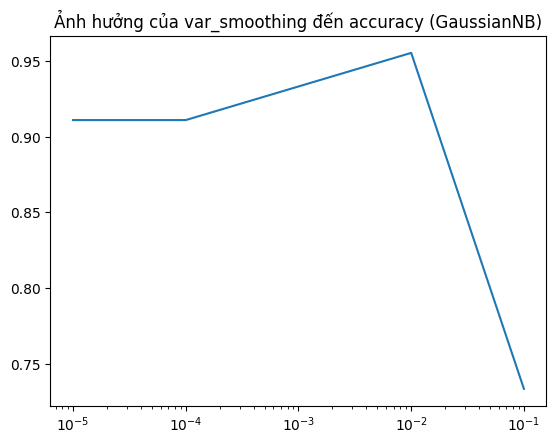

0.1 0.7333333333333333
0.01 0.9555555555555556
0.001 0.9333333333333333
0.0001 0.9111111111111111
1e-05 0.9111111111111111


In [43]:
from sklearn.metrics import accuracy_score
from sklearn import naive_bayes

var_smoothings = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
accs = []

for var_smoothing in var_smoothings:
    model_GNB = naive_bayes.GaussianNB(var_smoothing=var_smoothing) 
    model_GNB.fit(X_tfidf.toarray(), y_train)

    y_pred_tfidf = model_GNB.predict(X_test_tfidf.toarray())
    acc = accuracy_score(y_test, y_pred_tfidf)
    accs.append(acc)

import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(x=var_smoothings, y=accs)
plt.xscale('log')   
plt.title("Ảnh hưởng của var_smoothing đến accuracy (GaussianNB)")
plt.show()

for i in range(len(accs)):
    print(var_smoothings[i], accs[i])
